In [22]:
import scipy
import glob
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import io

In [ ]:
### Opens an IDL file in python using scipy ###
data = scipy.io.readsav("diffuse_survey_source_arrays/1130781304_source_array.sav",python_dict=True)

In [ ]:
# ==================================================================
# --------------Separating Point and Extended Sources---------------
# ==================================================================

#Finding length of data in *_source_array.sav to use as range in for loop
data_len = range(len(data['source_array']))

#Initializing lists for point and extended objects.
point_data_all = []
point_data_children = []
point_data_not_children = []
extended_data = []

#Separating data in *_source_array.sav between point and extended objects.
for i in data_len:
    if data['source_array'][i][-2] is None:
        point_data_all.append(data['source_array'][i])
    else:
        extended_data.append(data['source_array'][i])

In [49]:
### Creating a 2D histogram of a single extended obj. ###

elem = 12
x = data['source_array']['extend'][elem]['x']
y = data['source_array']['extend'][elem]['y']
plt.hist2d(x, y, bins=40)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('2-D Histogram of a Single Extended Source (Element 12)')
plt.show()
#plt.savefig('file_name')

TypeError: list indices must be integers, not str

In [15]:
### Create a function to open and plot one file ###

def filesav(filename):
    
    ### OPENING THE .SAV FILE IN PYTHON ###
    
    data = scipy.io.readsav(filename,python_dict=True) 
    
    data_len = range(len(data['source_array']))
    point_data = []
    extended_data = []

    for i in data_len:
        if data['source_array'][i][-2] is None:
            point_data.append(data['source_array'][i])
        else:
            extended_data.append(data['source_array'][i])
    
    print 'There are', len(data['source_array']), 'sources in this file.'
    print 'There are', len(extended_data), 'extended sources in this file.'
    print 'There are', len(point_data), 'point sources in this file.'
    
    #---------------------------------------------------------------------#
    
    ### DECLARING VARIABLES FOR PLOTS ###
    
    extended_X = []
    extended_Y = []
    extended_FREQ = []
    extended_I = []

    for i in range(len(extended_data)):
        extended_X.append(extended_data[i]['X'])
        extended_Y.append(extended_data[i]['Y'])
        extended_FREQ.append(extended_data[i]['FREQ'])
        extended_I.append(extended_data[i]['FLUX']['I'][0])

    point_X = []
    point_Y = []
    point_FREQ = []
    point_I = []

    for i in range(len(point_data)):
        point_X.append(point_data[i]['X'])
        point_Y.append(point_data[i]['Y'])
        point_FREQ.append(point_data[i]['FREQ'])
        point_I.append(point_data[i]['FLUX']['I'][0])

    intensity_all = []
    for i in range(len(data['source_array'])):
        intensity_all.append(data['source_array']['FLUX'][i]['I'][0])
        arrays = []
        
    for i in data_len: 
        arrays.append(data['source_array'][i]['flux'][0][0])

    vmax = np.mean(arrays)
    
    #------------------------------------------------------------------#
    
    ### PLOTTING THE DATA ###

    plt.figure(figsize=(18, 15))

    plt.subplot(3,3,1)
    plt.scatter(data['source_array']['X'],data['source_array']['Y'],c=data['source_array']['FREQ'])
    plt.title('Frequency (All Sources)')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.colorbar()

    plt.subplot(3,3,2)
    plt.scatter(data['source_array']['X'],data['source_array']['Y'],c=np.fft.ifft(intensity_all),vmax=vmax,s=10)
    plt.title('Inverse FT Intensity (All Sources)')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.colorbar()

    plt.subplot(3,3,3)
    plt.hist2d(data['source_array']['X'],data['source_array']['Y'],bins=100)
    plt.title('Position (All Sources)')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.colorbar()

    plt.subplot(3,3,4)
    plt.scatter(point_X,point_Y,c=point_FREQ)
    plt.title('Frequency (All Point Sources)')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.colorbar()

    plt.subplot(3,3,5)
    plt.scatter(point_X,point_Y,c=np.fft.ifft(point_I),vmax=vmax,s=10)
    plt.title('Inverse FT Intensity (All Point Sources)')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.colorbar()

    plt.subplot(3,3,6)
    plt.hist2d(point_X,point_Y,bins=100)
    plt.title('Position (All Point Sources)')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.colorbar()

    plt.subplot(3,3,7)
    plt.scatter(extended_X,extended_Y,c=extended_FREQ)
    plt.title('Frequency (Only Extended Sources)')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.colorbar()

    plt.subplot(3,3,8)
    plt.scatter(extended_X,extended_Y,c=np.fft.ifft(extended_I),vmax=vmax,s=10)
    plt.title('Inverse FT Intensity (Only Extended Sources)')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.colorbar()

    plt.subplot(3,3,9)
    plt.hist2d(extended_X,extended_Y,bins=100)
    plt.title('Position (Only Extended Sources)')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.colorbar()
    plt.show()

In [48]:
# ==================================================================
# --------------Separating Point and Extended Sources---------------
# ==================================================================

#Finding length of data in *_source_array.sav to use as range in for loop
data_len = range(len(data['source_array']))

#Initializing lists for point and extended objects.
point_data = []
extended_data = []

#Separating data in *_source_array.sav between point and extended objects.
for i in data_len:
    if data['source_array'][i][-2] is None:
        point_data.append(data['source_array'][i])
    else:
        extended_data.append(data['source_array'][i])

extended_X = []
extended_Y = []
extended_FREQ = []
extended_I = []

for i in range(len(extended_data)):
    extended_X.append(extended_data[i]['X'])
    extended_Y.append(extended_data[i]['Y'])
    extended_FREQ.append(extended_data[i]['FREQ'])
    extended_I.append(extended_data[i]['FLUX']['I'][0])

point_X = []
point_Y = []
point_FREQ = []
point_I = []

for i in range(len(point_data)):
    point_X.append(point_data[i]['X'])
    point_Y.append(point_data[i]['Y'])
    point_FREQ.append(point_data[i]['FREQ'])
    point_I.append(point_data[i]['FLUX']['I'][0])
    
intensity_all = []
for i in range(len(data['source_array'])):
    intensity_all.append(data['source_array']['FLUX'][i]['I'][0])
    
#-----------------------------------------------------------#
plt.figure(figsize=(18, 15))

plt.subplot(3,3,1)
plt.scatter(data['source_array']['X'],data['source_array']['Y'],c=data['source_array']['FREQ'])
plt.title('Frequency (All Sources)')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()

plt.subplot(3,3,2)
plt.scatter(data['source_array']['X'],data['source_array']['Y'],c=np.fft.ifft(intensity_all),vmax=.025)
plt.title('Inverse FT Intensity (All Sources)')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()

plt.subplot(3,3,3)
plt.hist2d(data['source_array']['X'],data['source_array']['Y'],bins=100)
plt.title('Position (All Sources)')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()

plt.subplot(3,3,4)
plt.scatter(point_X,point_Y,c=point_FREQ)
plt.title('Frequency (All Point Sources)')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()

plt.subplot(3,3,5)
plt.scatter(point_X,point_Y,c=np.fft.ifft(point_I),vmax=.025)
plt.title('Inverse FT Intensity (All Point Sources)')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()

plt.subplot(3,3,6)
plt.hist2d(point_X,point_Y,bins=100)
plt.title('Position (All Point Sources)')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()

plt.subplot(3,3,7)
plt.scatter(extended_X,extended_Y,c=extended_FREQ)
plt.title('Frequency (Only Extended Sources)')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()

plt.subplot(3,3,8)
plt.scatter(extended_X,extended_Y,c=np.fft.ifft(extended_I),vmax=.025,s=10)
plt.title('Inverse FT Intensity (Only Extended Sources)')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()

plt.subplot(3,3,9)
plt.hist2d(point_X,point_Y,bins=100)
plt.title('Position (Only Extended Sources)')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()
#plt.show()
#plt.savefig('firstplot.png')

TypeError: list indices must be integers, not str

In [ ]:
arrays = []
for i in data_len: 
    arrays.append(data['source_array'][i]['flux'][0][0])

vmax = np.mean(arrays)

plt.figure(figsize=(18, 15))

plt.subplot(3,3,1)
plt.scatter(data['source_array']['X'],data['source_array']['Y'],c=data['source_array']['FREQ'])
plt.title('Frequency (All Sources)')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()

plt.subplot(3,3,2)
plt.scatter(data['source_array']['X'],data['source_array']['Y'],c=np.fft.ifft(intensity_all),vmax=vmax)
plt.title('Inverse FT Intensity (All Sources)')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()

plt.subplot(3,3,3)
plt.hist2d(data['source_array']['X'],data['source_array']['Y'],bins=100)
plt.title('Position (All Sources)')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()

plt.subplot(3,3,4)
plt.scatter(point_X,point_Y,c=point_FREQ)
plt.title('Frequency (All Point Sources)')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()

plt.subplot(3,3,5)
plt.scatter(point_X,point_Y,c=np.fft.ifft(point_I),vmax=vmax)
plt.title('Inverse FT Intensity (All Point Sources)')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()

plt.subplot(3,3,6)
plt.hist2d(point_X,point_Y,bins=100)
plt.title('Position (All Point Sources)')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()

plt.subplot(3,3,7)
plt.scatter(extended_X,extended_Y,c=extended_FREQ)
plt.title('Frequency (Only Extended Sources)')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()

plt.subplot(3,3,8)
plt.scatter(extended_X,extended_Y,c=np.fft.ifft(extended_I),vmax=vmax,s=10)
plt.title('Inverse FT Intensity (Only Extended Sources)')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()

plt.subplot(3,3,9)
plt.hist2d(point_X,point_Y,bins=100)
plt.title('Position (Only Extended Sources)')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()
plt.show()

In [46]:
### Create a function to open lots of files at once ###

def foldersav():
    
    all_files = glob.glob('diffuse_survey_source_arrays/*.sav')
    
    for o in range(len(all_files)):
        
        filename = all_files[o]
        
        print filename
    
        ### OPENING THE .SAV FILE IN PYTHON ###

        data = scipy.io.readsav(filename,python_dict=True) 

        data_len = range(len(data['source_array']))
        point_data = []
        extended_data = []

        for i in data_len:
            if data['source_array'][i][-2] is None:
                point_data.append(data['source_array'][i])
            else:
                extended_data.append(data['source_array'][i])

        print 'There are', len(data['source_array']), 'sources in this file.'
        print 'There are', len(extended_data), 'extended sources in this file.'
        print 'There are', len(point_data), 'point sources in this file.'

        #---------------------------------------------------------------------#

        ### DECLARING VARIABLES FOR PLOTS ###

        extended_X = []
        extended_Y = []
        extended_FREQ = []
        extended_I = []

        for i in range(len(extended_data)):
            extended_X.append(extended_data[i]['X'])
            extended_Y.append(extended_data[i]['Y'])
            extended_FREQ.append(extended_data[i]['FREQ'])
            extended_I.append(extended_data[i]['FLUX']['I'][0])

        point_X = []
        point_Y = []
        point_FREQ = []
        point_I = []

        for i in range(len(point_data)):
            point_X.append(point_data[i]['X'])
            point_Y.append(point_data[i]['Y'])
            point_FREQ.append(point_data[i]['FREQ'])
            point_I.append(point_data[i]['FLUX']['I'][0])

        intensity_all = []
        for i in range(len(data['source_array'])):
            intensity_all.append(data['source_array']['FLUX'][i]['I'][0])
            arrays = []

        for i in data_len: 
            arrays.append(data['source_array'][i]['flux'][0][0])

        vmax = np.mean(arrays)

        #------------------------------------------------------------------#

        ### PLOTTING THE DATA ###

        plt.figure(figsize=(18, 15))

        plt.subplot(3,3,1)
        plt.scatter(data['source_array']['X'],data['source_array']['Y'],c=data['source_array']['FREQ'])
        plt.title('Frequency (All Sources)')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.colorbar()

        plt.subplot(3,3,2)
        plt.scatter(data['source_array']['X'],data['source_array']['Y'],c=np.fft.ifft(intensity_all),vmax=vmax,s=10)
        plt.title('Inverse FT Intensity (All Sources)')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.colorbar()

        plt.subplot(3,3,3)
        plt.hist2d(data['source_array']['X'],data['source_array']['Y'],bins=100)
        plt.title('Position (All Sources)')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.colorbar()

        plt.subplot(3,3,4)
        plt.scatter(point_X,point_Y,c=point_FREQ)
        plt.title('Frequency (All Point Sources)')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.colorbar()

        plt.subplot(3,3,5)
        plt.scatter(point_X,point_Y,c=np.fft.ifft(point_I),vmax=vmax,s=10)
        plt.title('Inverse FT Intensity (All Point Sources)')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.colorbar()

        plt.subplot(3,3,6)
        plt.hist2d(point_X,point_Y,bins=100)
        plt.title('Position (All Point Sources)')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.colorbar()

        plt.subplot(3,3,7)
        plt.scatter(extended_X,extended_Y,c=extended_FREQ)
        plt.title('Frequency (Only Extended Sources)')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.colorbar()

        plt.subplot(3,3,8)
        plt.scatter(extended_X,extended_Y,c=np.fft.ifft(extended_I),vmax=vmax,s=10)
        plt.title('Inverse FT Intensity (Only Extended Sources)')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.colorbar()

        plt.subplot(3,3,9)
        plt.hist2d(extended_X,extended_Y,bins=100)
        plt.title('Position (Only Extended Sources)')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.colorbar()
        plt.show()
        

There are 5181 sources in this file.
There are 3289 extended sources in this file.
There are 1892 point sources in this file.


/home/champ2/anaconda2/lib/python2.7/site-packages/numpy/core/numeric.py:583: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


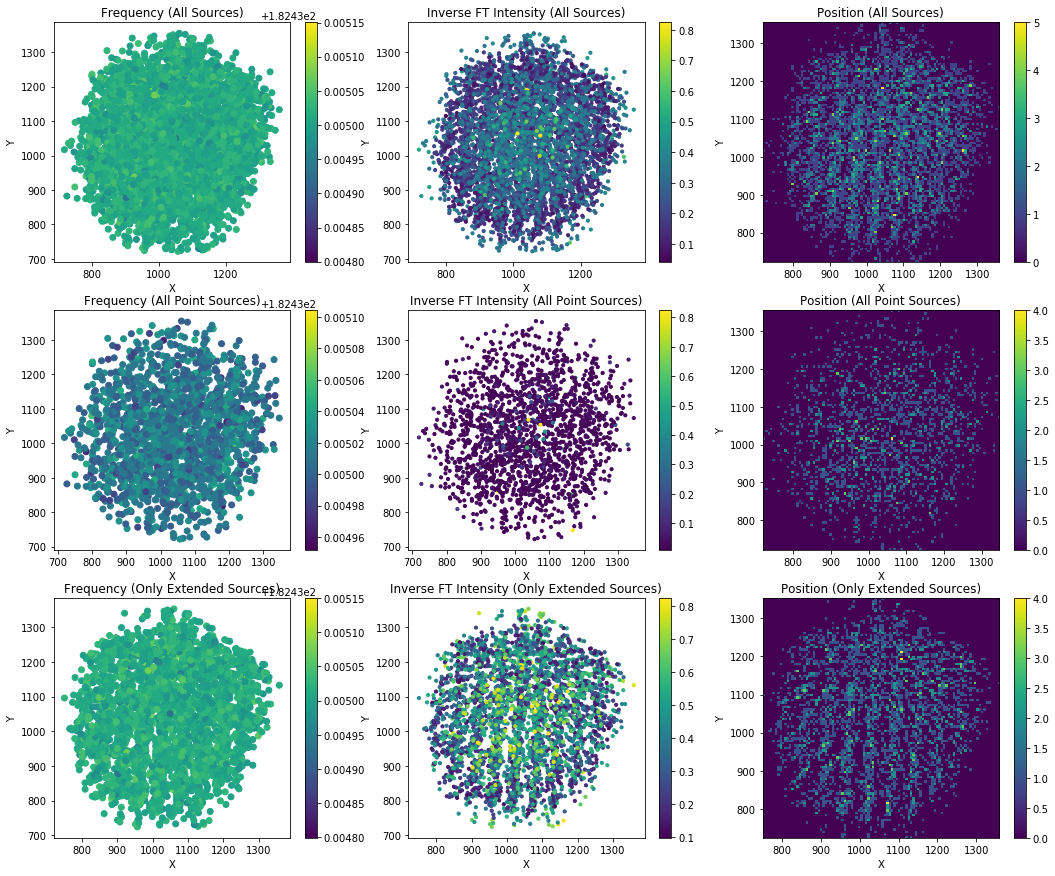

There are 6554 sources in this file.
There are 2271 extended sources in this file.
There are 4283 point sources in this file.


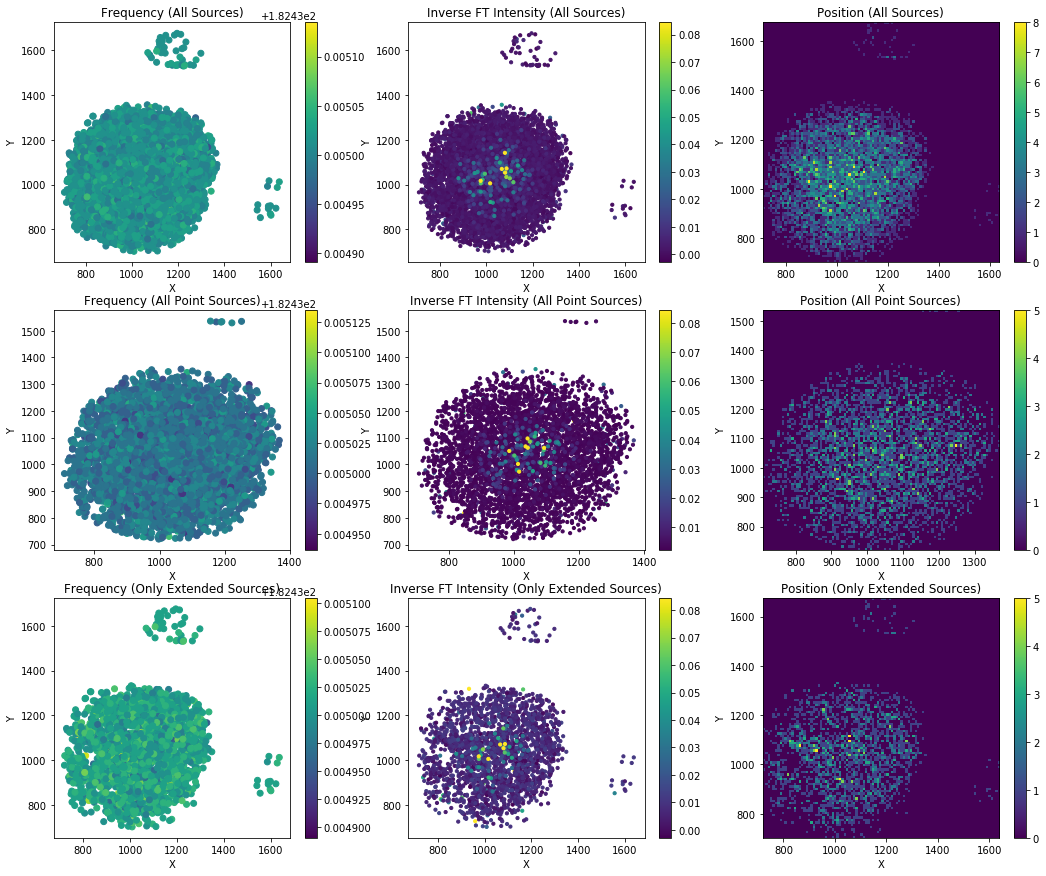

There are 5535 sources in this file.
There are 2274 extended sources in this file.
There are 3261 point sources in this file.


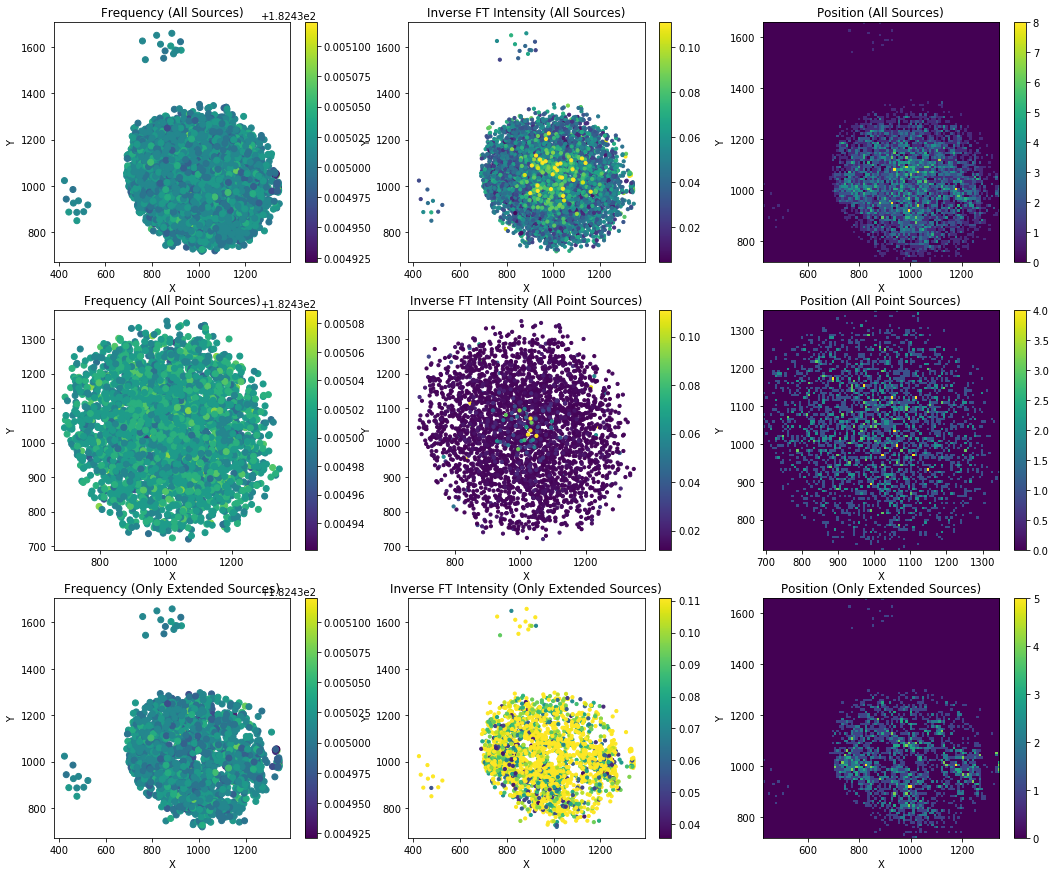

There are 1643 sources in this file.
There are 305 extended sources in this file.
There are 1338 point sources in this file.


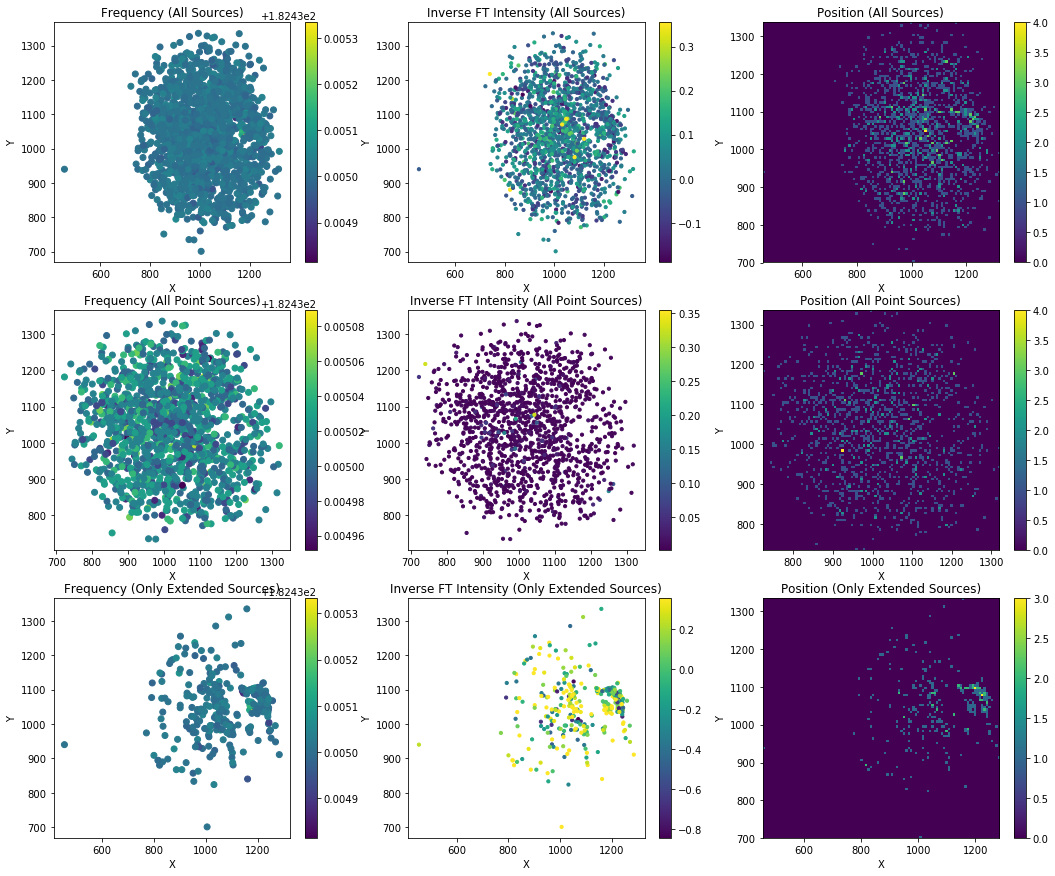

There are 5905 sources in this file.
There are 2311 extended sources in this file.
There are 3594 point sources in this file.


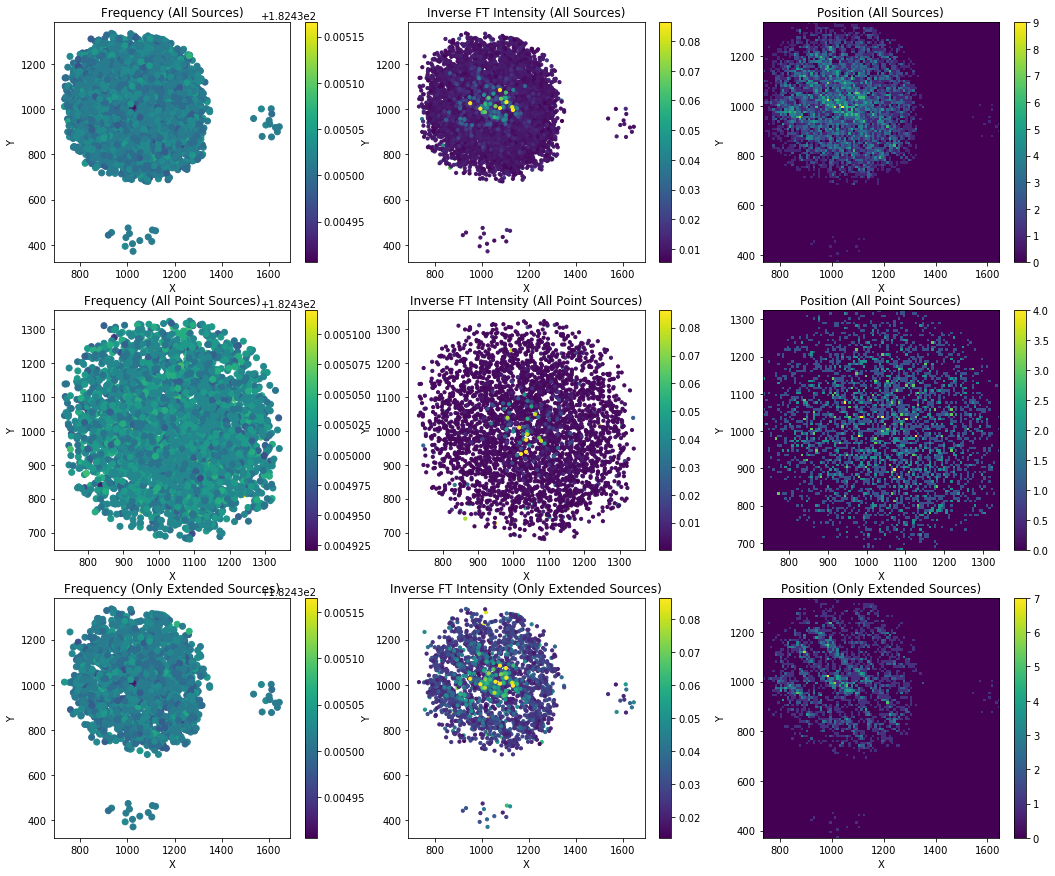

There are 7210 sources in this file.
There are 2664 extended sources in this file.
There are 4546 point sources in this file.


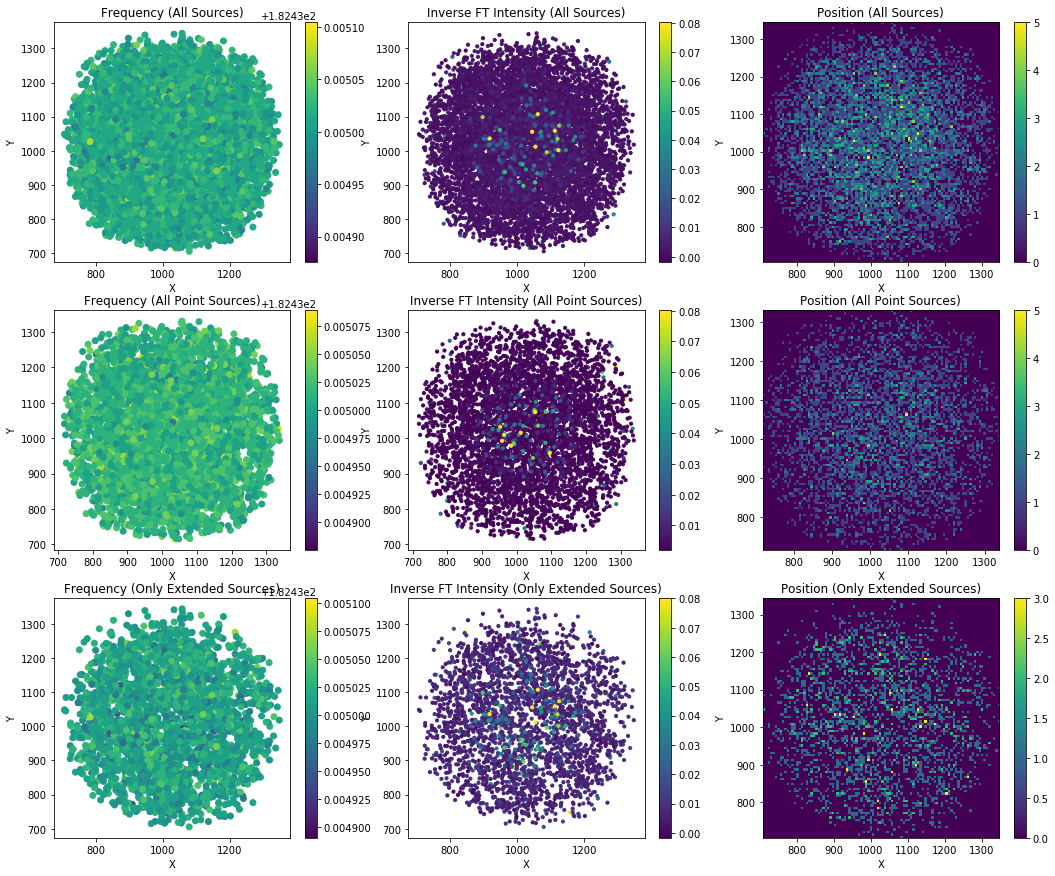

There are 5931 sources in this file.
There are 2215 extended sources in this file.
There are 3716 point sources in this file.


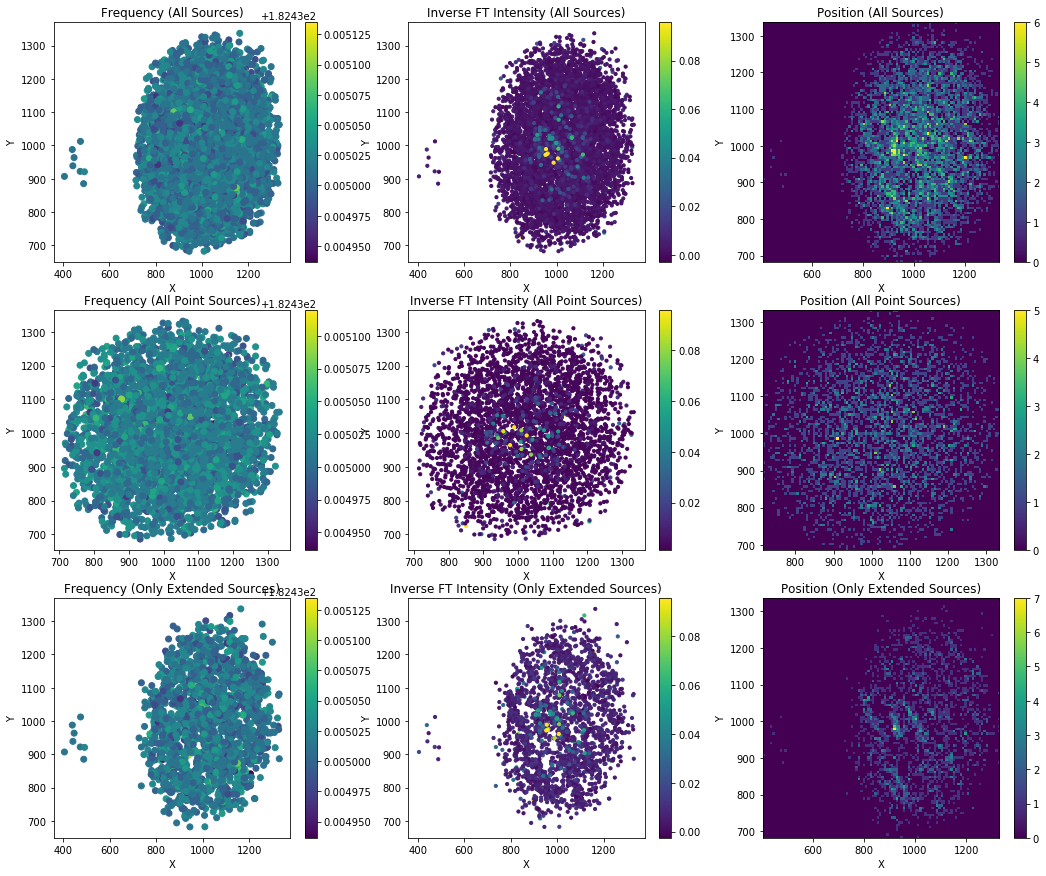

There are 5315 sources in this file.
There are 2778 extended sources in this file.
There are 2537 point sources in this file.


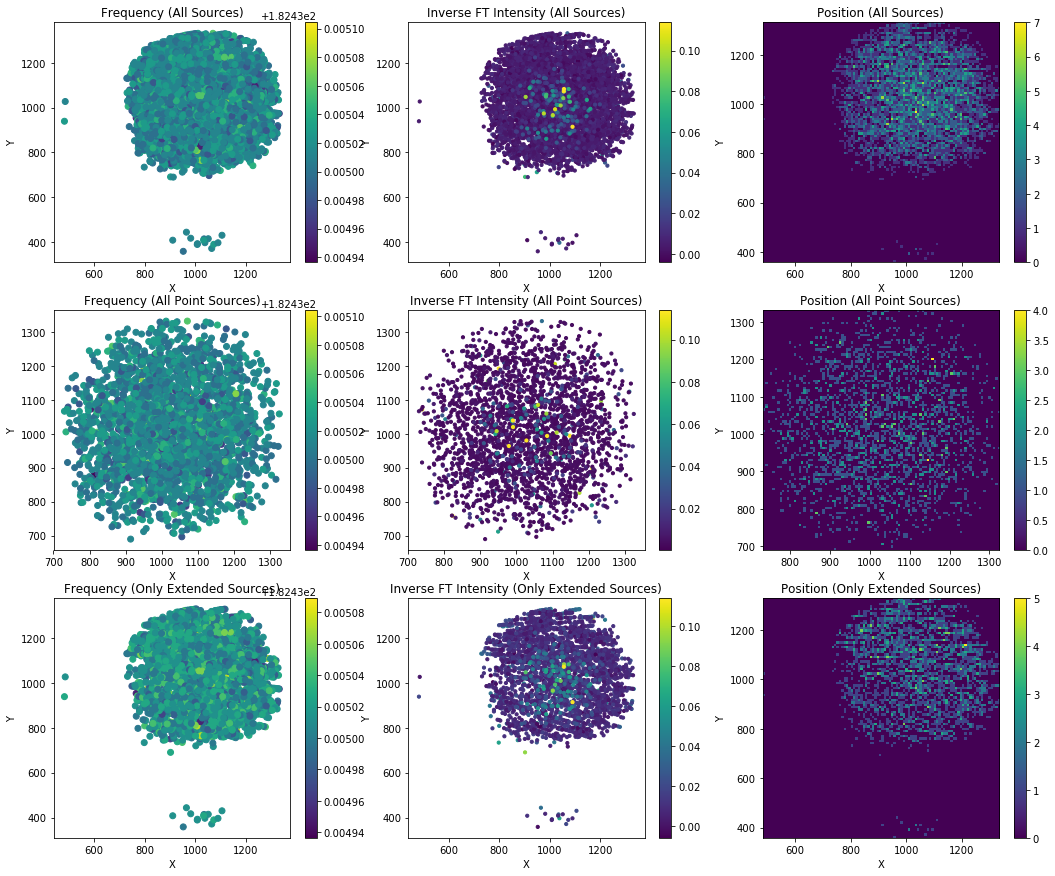

There are 4724 sources in this file.
There are 2662 extended sources in this file.
There are 2062 point sources in this file.


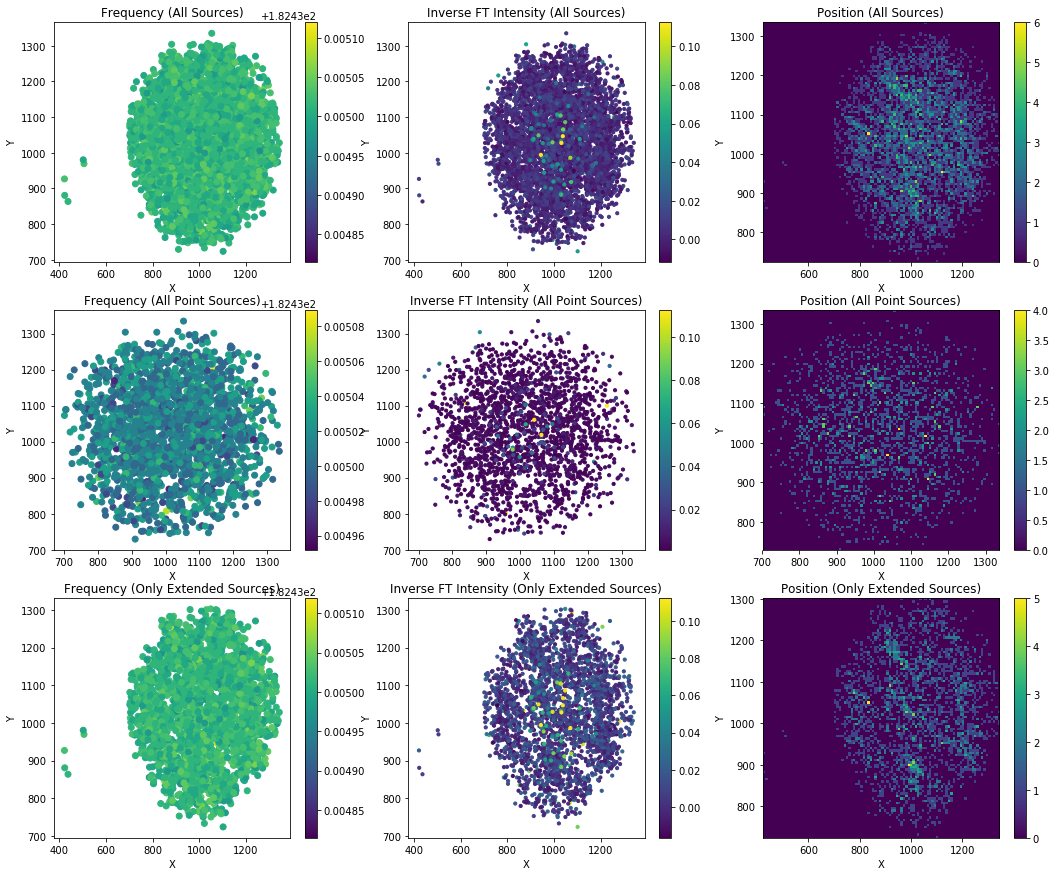

There are 5267 sources in this file.
There are 3007 extended sources in this file.
There are 2260 point sources in this file.


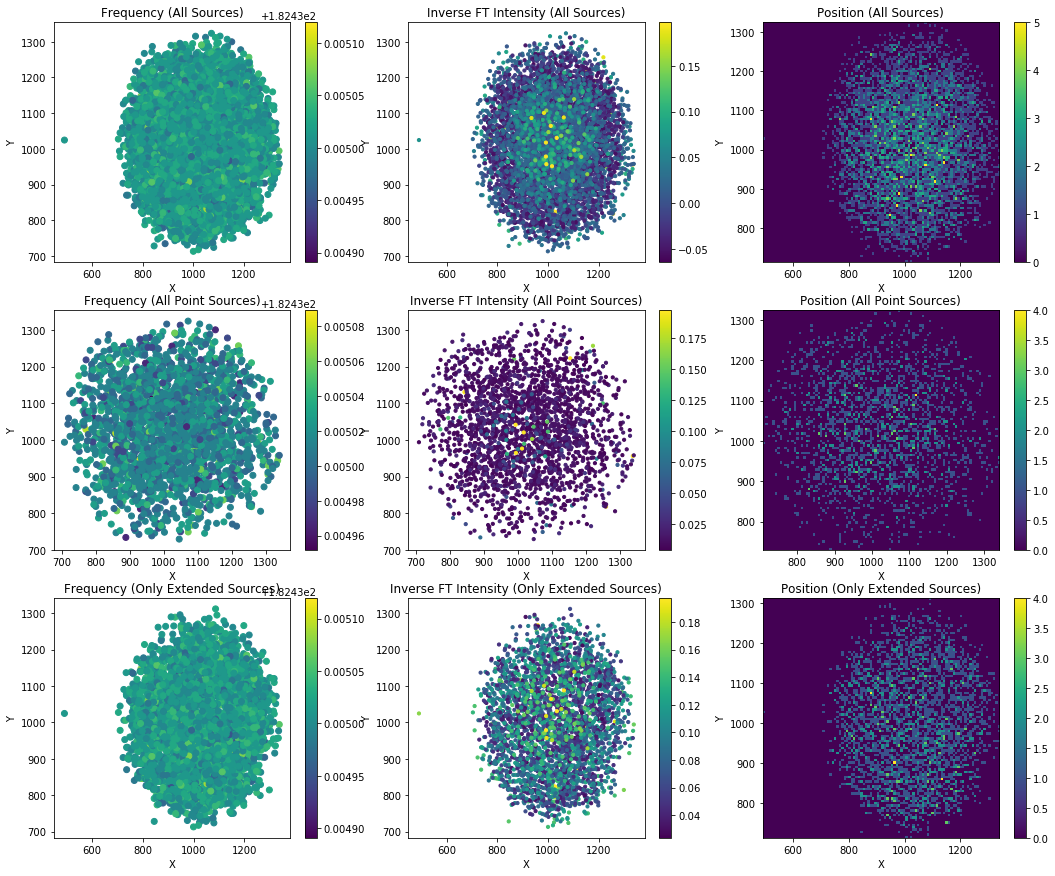

There are 5139 sources in this file.
There are 2554 extended sources in this file.
There are 2585 point sources in this file.


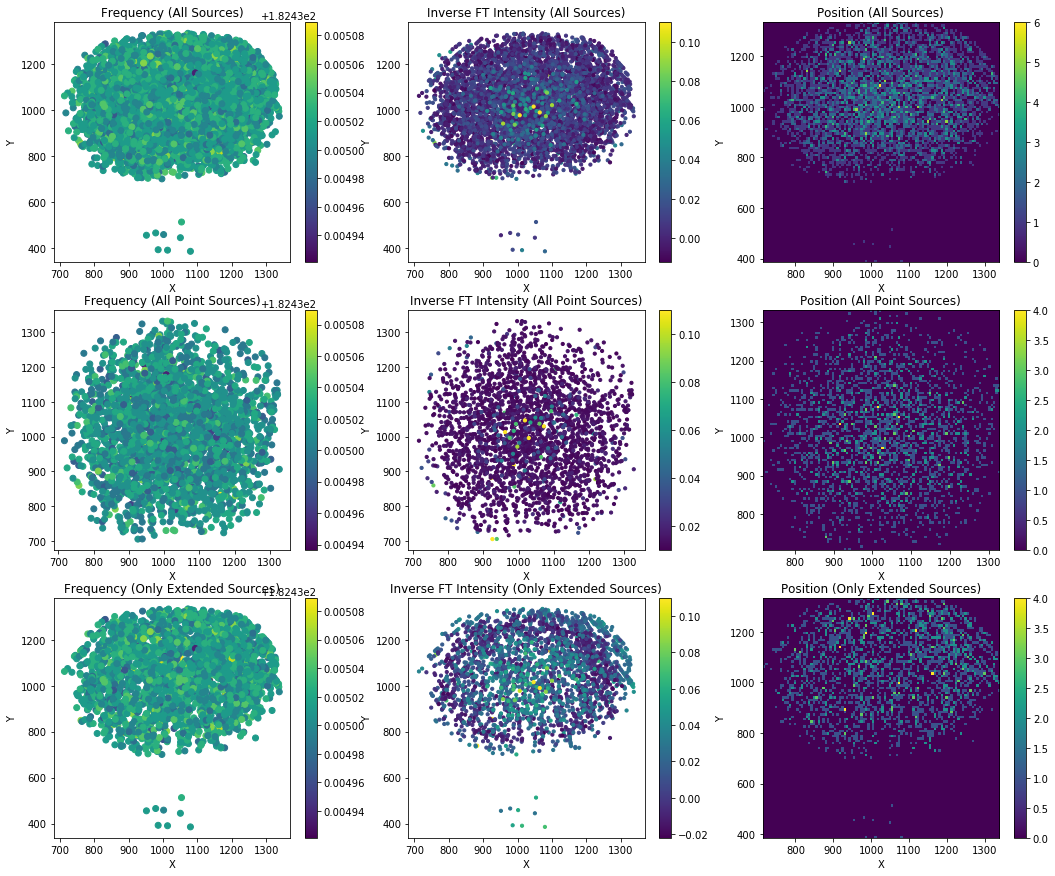

There are 6096 sources in this file.
There are 2410 extended sources in this file.
There are 3686 point sources in this file.


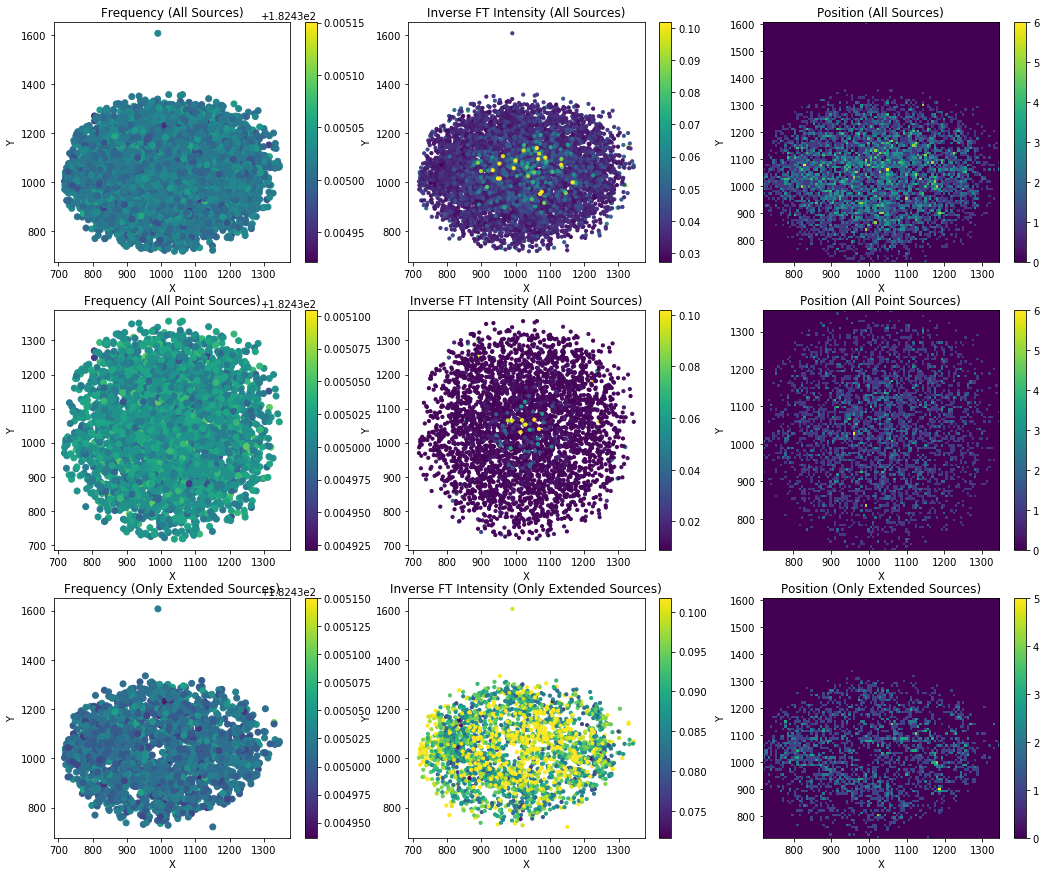

In [47]:
'''
all_files = glob.glob('foldername/*.sav')
for o in range(len(all_files)):
        
     filename = all_files[o]
    
     ### OPENING THE .SAV FILE IN PYTHON ###

     data = scipy.io.readsav(filename,python_dict=True) 
     '''
foldersav()